In [ ]:
Classification: Naïve Bayes 
Dataset: NaiveBayes.csv
Use probabilistic approach to implement Classifier model. Evaluate
the performance of the model.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('NaiveBayes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
X = df[['Age','Salary']]
y = df['Purchased']

In [10]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
nb_classifier = GaussianNB()

In [14]:
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred = nb_classifier.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.925

Confusion Matrix:
[[50  2]
 [ 4 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



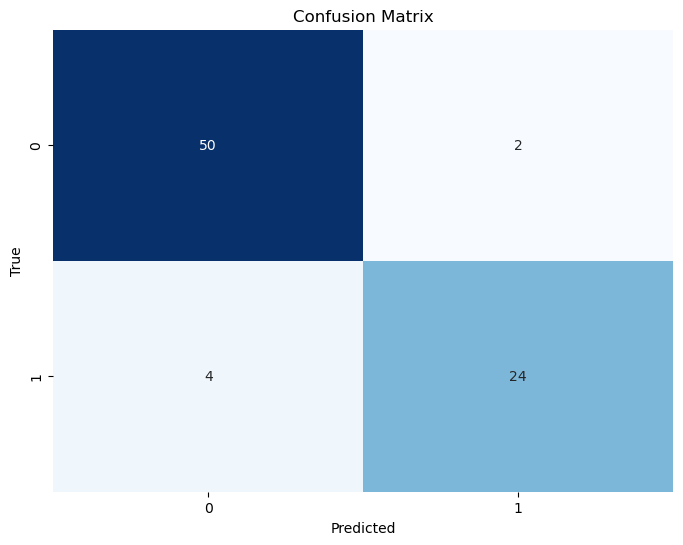

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
y_prob = nb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

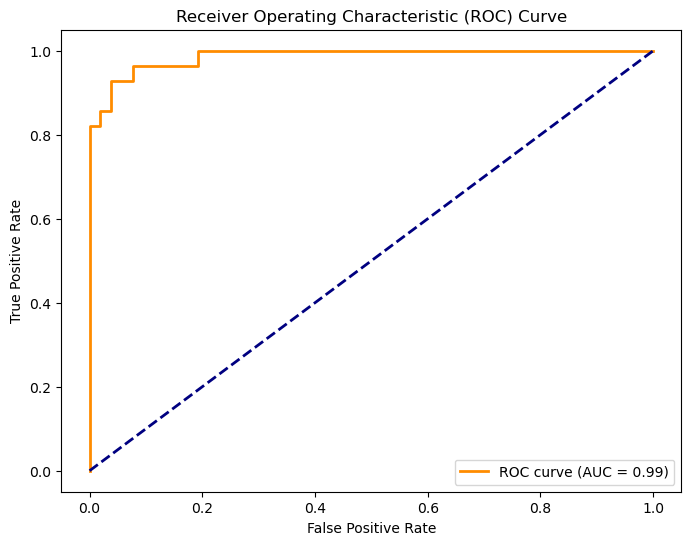

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()